Here, I have predicted house sales using multiple linear regression.

Steps:

1) Import dependent libraries <br>
2) Read data <br>
3) Exploratory analysis<br>
4) Apply Label Encoding and one hot encoding<br>
5) Feature Engineering - Find out the most correlated columns with SalesPrice and use only those columns in model<br>
6) Replace null values with median<br>
7) Apply normalization<br>
8) Split train-testing data, so we can check the accuracy of model<br>
9) Generate linear regression<br>
10) Predict sales value<br>
11) Evaluate predicted value<br>
12) Apply linear model to test data and save it!<br>

#### 1) Import dependent libraries

In [42]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = [12,5]
warnings.filterwarnings("ignore")

In [43]:
# Because my Jupyter was showing only last line output, so need to add
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### 2) Read data from training and testing file

In [68]:
# read train and testing data

train = pd.read_csv("../../data/house_prices/train.csv")
test = pd.read_csv("../../data/house_prices/test.csv")
testID = test["Id"]
# train.head()
# test.head() 
# testID

#### 3) Exploratory analysis

In [67]:
# train.columns
# train.shape
# test.shape

In [66]:
# train.info()

In [69]:
# temp.isna().sum().sort_values().tail(20)

In [90]:
train_num = train._get_numeric_data() # alternative: dfName.select_dtypes(include=['int', 'float']).columns
train_cat = train[np.array(list(set(train.columns) - set(train_num.columns)))] # alternative: train.select_dtypes(exclude=['int', 'float']).columns
# train_cat.head()
# train_num.head()

In [89]:
# train_cat.fillna(train_cat.mode())
# train_num.fillna(train_num.mean())
# train_cat['Alley']


In [78]:
# i=0
# for col in train:
#     print(col)
#     i+=1
# print(i)

In [93]:
# replace NaN value! If striing column, then using mode otherwise median
for col in train:
    if train[col].dtype == "object":
        train[col] = train[col].fillna(train[col].mode())
#         print(f'this is CAT: {col}')
    else:
        train[col] = train[col].fillna(train[col].median())
#         print(f'this is NUM: {col}')


#### 4) Apply Label Encoding and one hot encoding

In [94]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [11]:
from sklearn.preprocessing import LabelEncoder


def label_encoding(df_train, df_test):
    le_count = 0
    for col in df_train:
        if df_train[col].dtype == "object":
            if len(list(df_train[col].unique())) <= 2:
                le = LabelEncoder()
                le.fit(list(df_train[col].unique()) + list(df_test[col].unique()))

                df_train[col] = le.transform(df_train[col].astype(str))
                df_test[col] = le.transform(df_test[col].astype(str))
                le_count += 1

    print("Total label encoded columns : %d " % le_count)

In [12]:
label_encoding(train, test)
train.shape
test.shape

Total label encoded columns : 3 


(1460, 81)

(1459, 80)

In [13]:
import copy

train_objs_num = len(train)
dataset = pd.concat(objs=[train, test], axis=0)
dataset = pd.get_dummies(dataset)
train = copy.copy(dataset[:train_objs_num])
test = copy.copy(dataset[train_objs_num:])
test = test.drop(["SalePrice"], axis=1)
train.shape
test.shape

(1460, 287)

(1459, 286)

''

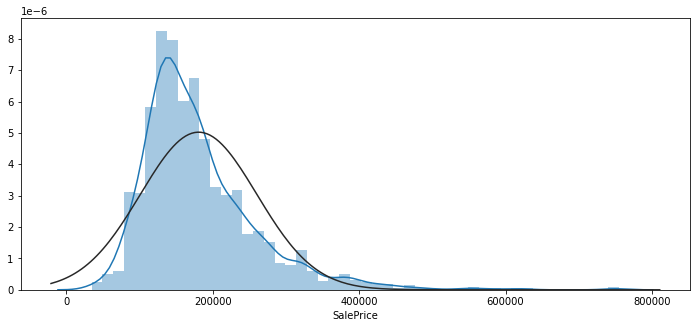

In [14]:
# display the distribution of salePrice
from scipy.stats import norm

sns.distplot(train["SalePrice"], fit=norm, hist=True)
;

#### 5) Feature Engineering - Find out the most correlated columns with SalesPrice and use only those columns in model

In [15]:
corr = train.corr()

In [16]:
corr = corr.sort_values("SalePrice")
cols = corr["SalePrice"][corr["SalePrice"].values > 0.4].index.values

In [17]:
cols

array(['Neighborhood_NridgHt', 'GarageFinish_Fin', 'HeatingQC_Ex',
       'BsmtFinType1_GLQ', 'ExterQual_Ex', 'ExterQual_Gd', 'GarageYrBlt',
       'Fireplaces', 'MasVnrArea', 'Foundation_PConc', 'KitchenQual_Ex',
       'YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'BsmtQual_Ex',
       'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars',
       'GrLivArea', 'OverallQual', 'SalePrice'], dtype=object)

We will draw heatmap plot of top 10 correlated variables!

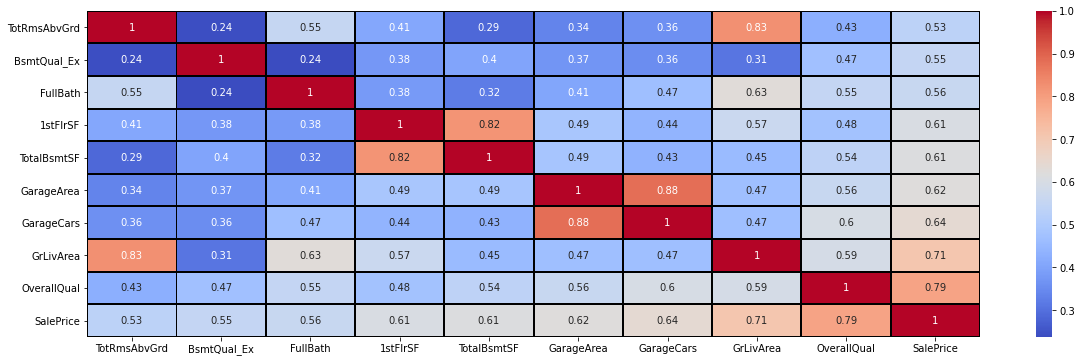

In [18]:
# Abbas Solution
top10 = train[cols[-10:]]
top10_corr = top10.corr()
plt.figure(figsize=(20,6))
sns.heatmap(top10_corr, annot = True,cmap= 'coolwarm',linecolor='Black', linewidths=.9); 
# sns.heatmap(dataset.corr(), annot = True); # heatmap blue_print

In [19]:
# heatMapCols=np.append(cols[-10:], np.array(['SalePrice']))
# cm = np.corrcoef(train[heatMapCols[::-1]].T)
# plt.figure(figsize=(16,16))
# sns.set(font_scale=1)
# with sns.axes_style("white"):
#     sns.heatmap(cm,yticklabels=heatMapCols[::-1],xticklabels=heatMapCols[::-1],fmt='.2f',annot_kws={'size':10},annot=True,square=True,cmap=None)

In [20]:
arr = np.array([1,2,3,4,5])


In [21]:
t= np.delete(arr,-1)
t
len(cols)
cols

array([1, 2, 3, 4])

23

array(['Neighborhood_NridgHt', 'GarageFinish_Fin', 'HeatingQC_Ex',
       'BsmtFinType1_GLQ', 'ExterQual_Ex', 'ExterQual_Gd', 'GarageYrBlt',
       'Fireplaces', 'MasVnrArea', 'Foundation_PConc', 'KitchenQual_Ex',
       'YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'BsmtQual_Ex',
       'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars',
       'GrLivArea', 'OverallQual', 'SalePrice'], dtype=object)

In [22]:
train_label = train["SalePrice"]

cols = np.delete(cols, len(cols) - 1)
train_sample = train[cols]
cols
test_sample = test[cols]

array(['Neighborhood_NridgHt', 'GarageFinish_Fin', 'HeatingQC_Ex',
       'BsmtFinType1_GLQ', 'ExterQual_Ex', 'ExterQual_Gd', 'GarageYrBlt',
       'Fireplaces', 'MasVnrArea', 'Foundation_PConc', 'KitchenQual_Ex',
       'YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'BsmtQual_Ex',
       'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars',
       'GrLivArea', 'OverallQual'], dtype=object)

In [23]:
test_sample.shape
train_sample.shape
test_sample.head()
train_sample.head()

(1459, 22)

(1460, 22)

,Neighborhood_NridgHt,GarageFinish_Fin,HeatingQC_Ex,BsmtFinType1_GLQ,ExterQual_Ex,ExterQual_Gd,GarageYrBlt,Fireplaces,MasVnrArea,Foundation_PConc,...,YearBuilt,TotRmsAbvGrd,BsmtQual_Ex,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,0,0,0,0,0,0,1961.0,0,0.0,0,...,1961,5,0,1,896,882.0,730.0,1.0,896,5
1,0,0,0,0,0,0,1958.0,0,108.0,0,...,1958,6,0,1,1329,1329.0,312.0,1.0,1329,6
2,0,1,0,1,0,0,1997.0,1,0.0,1,...,1997,6,0,2,928,928.0,482.0,2.0,1629,5
3,0,1,1,1,0,0,1998.0,1,20.0,1,...,1998,7,0,2,926,926.0,470.0,2.0,1604,6
4,0,0,1,0,0,1,1992.0,0,0.0,1,...,1992,5,0,2,1280,1280.0,506.0,2.0,1280,8


,Neighborhood_NridgHt,GarageFinish_Fin,HeatingQC_Ex,BsmtFinType1_GLQ,ExterQual_Ex,ExterQual_Gd,GarageYrBlt,Fireplaces,MasVnrArea,Foundation_PConc,...,YearBuilt,TotRmsAbvGrd,BsmtQual_Ex,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,0,0,1,1,0,1,2003.0,0,196.0,1,...,2003,8,0,2,856,856.0,548.0,2.0,1710,7
1,0,0,1,0,0,0,1976.0,1,0.0,0,...,1976,6,0,2,1262,1262.0,460.0,2.0,1262,6
2,0,0,1,1,0,1,2001.0,1,162.0,1,...,2001,6,0,2,920,920.0,608.0,2.0,1786,7
3,0,0,0,0,0,0,1998.0,1,0.0,0,...,1915,7,0,1,961,756.0,642.0,3.0,1717,7
4,0,0,1,1,0,1,2000.0,1,350.0,1,...,2000,9,0,2,1145,1145.0,836.0,3.0,2198,8


#### 6) Replace null values with median

In [27]:
train_sample.head()

,Neighborhood_NridgHt,GarageFinish_Fin,HeatingQC_Ex,BsmtFinType1_GLQ,ExterQual_Ex,ExterQual_Gd,GarageYrBlt,Fireplaces,MasVnrArea,Foundation_PConc,...,YearBuilt,TotRmsAbvGrd,BsmtQual_Ex,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,0,0,1,1,0,1,2003.0,0,196.0,1,...,2003,8,0,2,856,856.0,548.0,2.0,1710,7
1,0,0,1,0,0,0,1976.0,1,0.0,0,...,1976,6,0,2,1262,1262.0,460.0,2.0,1262,6
2,0,0,1,1,0,1,2001.0,1,162.0,1,...,2001,6,0,2,920,920.0,608.0,2.0,1786,7
3,0,0,0,0,0,0,1998.0,1,0.0,0,...,1915,7,0,1,961,756.0,642.0,3.0,1717,7
4,0,0,1,1,0,1,2000.0,1,350.0,1,...,2000,9,0,2,1145,1145.0,836.0,3.0,2198,8


In [24]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

imputer.fit(train_sample)

train_sample = imputer.transform(train_sample)
test_sample = imputer.transform(test_sample)

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (/Users/Optimus/opt/anaconda3/envs/env1/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

In [28]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(train_sample.values)
train_sample = imp.transform(train_sample.values)
test_sample = imp.transform(test_sample.values)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [29]:
test_sample

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 8.960e+02,
        5.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.329e+03,
        6.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 2.000e+00, 1.629e+03,
        5.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 1.224e+03,
        5.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 9.700e+02,
        5.000e+00],
       [0.000e+00, 1.000e+00, 1.000e+00, ..., 3.000e+00, 2.000e+03,
        7.000e+00]])

#### 7) Apply normalization

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_sample)

train_sample = scaler.transform(train_sample)
test_sample = scaler.transform(test_sample)
test_sample.head()

StandardScaler(copy=True, with_mean=True, with_std=True)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

#### 8) Split train-testing data, so we can check the accuracy of model

In [ ]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train_sample, train_label, train_size=0.8
)

In [ ]:
X_train.shape
X_test.shape
test_sample.shape

#### 9) Generate linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_sample, train_label)

#### 10) Predict sales value

In [ ]:
y_preds = model.predict(X_test)

#### 11) Evaluate predicted value

In [ ]:
from sklearn import metrics

print("Root Mean square error: ", np.sqrt(metrics.mean_squared_error(y_test, y_preds)))

#### 12) Apply linear model to test data and save it!

In [ ]:
test_pred = model.predict(test_sample)
submit = pd.DataFrame()
submit["ID"] = testID
submit["SalePrice"] = test_pred
submit.head()

In [ ]:
submit.to_csv("attemp1.csv", index=False)

Let's draw pair plots between SalePrice and top correlated variables! So, we get better idea about the variables and it's relationship with SalePrice.

In [ ]:
cols = [
    "OverallQual",
    "GrLivArea",
    "GarageCars",
    "GarageArea",
    "TotalBsmtSF",
    "1stFlrSF",
]

test_cols = test[cols]

imputer = Imputer(strategy="median")

imputer.fit(test_cols)

test_cols = imputer.transform(test_cols)


count = 0

f, axes = plt.subplots(2, 3, figsize=(15, 12))

for i in range(2):
    for j in range(3):
        sns.kdeplot(test_cols[:, count], test_pred, ax=axes[i][j])
        axes[i][j].set_xlabel("%s" % cols[count])
        axes[i][j].set_ylabel("Sale Price")
        count += 1


f.tight_layout()

Using this model, I have scored 0.155, which is pretty good with basic model!.

As mentioned in competition, we can get more accurate model if we use advance regression model like Random forest or Light GBM. We will see that in future post!